# <center><b> **$\color{brown}{\text {INTRODUCTION À}}$** </b> </center>
![Logo de pandas](https://pandas.pydata.org/docs/_static/pandas.svg)
Tutoriel sur [pandas](http://pandas.pydata.org/) ([documentation](http://pandas.pydata.org/pandas-docs/stable/index.html)), bibliothèque python permettant d'analyser et d'interroger rapidement des données; particulièrement utile lorsqu'on a des fichiers volumineux qu'un tableur comme *Excel*, *Calc* ou *Google Sheets* a de la difficulté à avaler.<br>
<hr>

Toujours on commence par importer les modules dont nous aurons besoin. On leur donne même un surnom. C'est ainsi que **```pandas```** devient **```pd```**, par exemple.
<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Ci-dessous, on lit [le fichier que je vous ai donnés ```sample.txt```](https://drive.google.com/drive/folders/1MDUCDkuu3Gqig60vARxtCIEwpgSogerf).<br>
On le met dans une variable ```df```. <br>
Pour pandas, cette structure de données, qui consiste en un tableau, est appelé un _**dataframe**_.<br>

In [3]:
df = pd.read_csv("./data/sample.txt", sep = " ", header = 0)
df

,lambda(angstroms),flux(ergs^-1cm^-2a^-1),err(ergs^-1cm^-2a^-1),tem
0,3637.390,0.314,0.000,54.029
1,3638.227,0.717,0.000,53.619
2,3639.065,1.482,0.000,52.849
3,3639.903,0.798,7.011,53.527
4,3640.741,0.506,7.032,56.245
...,...,...,...,...
3419,7992.632,-0.276,1.560,65.696
3420,7994.473,1.017,1.593,66.559
3421,7996.314,-1.980,1.580,67.714
3422,7998.154,-2.038,1.563,67.388


Pour connaître le type des variables que contient notre tableau, on peut utiliser la fonction ```.dtypes```.<p>
Dans pandas, les principaux types de variables sont&nbsp;:

* ```int``` -> nombres entiers
* ```float``` -> nombres décimaux
* ```object``` -> chaînes de caractères
* ```datetime``` -> dates
* ```bool``` -> vrai ou faux

Ces types sont parfois suivis d'un nombre qui indique la taille, en caractères, maximale des variables de ce type.

In [4]:
df.dtypes

lambda(angstroms)         float64
flux(ergs^-1cm^-2a^-1)    float64
err(ergs^-1cm^-2a^-1)     float64
tem                       float64
dtype: object

## Exploration simple de nos données
-----

Pour afficher simplement le contenu de notre variable, il n'est pas nécessaire d'écrire `print(df)`.
Écrire le nom de la variable suffit.
Cela produit un immense tableau de notre fichier.

In [ ]:
df

Pour avoir un aperçu des dimensions de de votre tableau, utilisez plutôt la fonction ```.shape```.

In [5]:
df.shape

(3424, 4)

Pour consulter les premières ou les dernières lignes de votre tableau, vous pouvez vous servir de fonctions  ```.head()``` et ```.tail()```.

In [8]:
df.head()

,lambda(angstroms),flux(ergs^-1cm^-2a^-1),err(ergs^-1cm^-2a^-1),tem
0,3637.390,0.314,0.000,54.029
1,3638.227,0.717,0.000,53.619
2,3639.065,1.482,0.000,52.849
3,3639.903,0.798,7.011,53.527
4,3640.741,0.506,7.032,56.245


In [10]:
df.tail(10)

,lambda(angstroms),flux(ergs^-1cm^-2a^-1),err(ergs^-1cm^-2a^-1),tem
3414,7983.435,-0.304,1.623,66.483
3415,7985.274,-1.453,1.599,66.413
3416,7987.112,0.620,1.626,66.963
3417,7988.952,0.327,1.619,67.307
3418,7990.792,1.808,1.596,66.221
3419,7992.632,-0.276,1.560,65.696
3420,7994.473,1.017,1.593,66.559
3421,7996.314,-1.980,1.580,67.714
3422,7998.154,-2.038,1.563,67.388
3423,7999.997,0.616,1.583,65.228


Pour consulter un intervalle précis de lignes, vous pouvez vous servir des crochets. Vous reconnaissez cette syntaxe puisque pandas, c'est du python!<br>
C'est ainsi que, ci-dessous, je demande à afficher les lignes 1000 à 1009 de mon fichier (comme en python, la limite supérieure est exclue de mon intervalle).

In [11]:
df[1000:1009]

,lambda(angstroms),flux(ergs^-1cm^-2a^-1),err(ergs^-1cm^-2a^-1),tem
1000,4579.202,3.484,2.113,63.361
1001,4580.256,1.509,2.093,63.193
1002,4581.312,1.347,2.088,63.090
1003,4582.366,-1.150,2.055,62.405
1004,4583.421,-0.679,2.068,62.923
1005,4584.477,0.957,2.092,63.194
1006,4585.533,1.507,2.104,63.126
1007,4586.589,1.000,2.101,61.933
1008,4587.645,-0.607,2.104,62.667


Pour faire afficher un nombre limité de colonnes, on peut ajouter une liste du nom des colonnes qu'on souhaite.<br>
Il faut cependant le faire avec la fonction ```.loc```.

In [12]:
df.loc[1000:1004, ["lambda(angstroms)","flux(ergs^-1cm^-2a^-1)"]]

,lambda(angstroms),flux(ergs^-1cm^-2a^-1)
1000,4579.202,3.484
1001,4580.256,1.509
1002,4581.312,1.347
1003,4582.366,-1.150
1004,4583.421,-0.679


On peut aussi utiliser, au lieu du nom des colonnes, le numéro d'index des colonnes qu'on souhaite afficher.<br>
Il faut alors utiliser la fonction ```.iloc```

In [14]:
df.iloc[1000:1004,0:1]

,lambda(angstroms)
1000,4579.202
1001,4580.256
1002,4581.312
1003,4582.366


## Opérations sur les colonnes
-----

Il est souvent utile de connaître le nom des colonnes de notre fichier.<br>
Pour ce faire, entrez la fonction ```.columns```.

In [15]:
df.columns

Index(['lambda(angstroms)', 'flux(ergs^-1cm^-2a^-1)', 'err(ergs^-1cm^-2a^-1)',
       'tem'],
      dtype='object')

Vous remarquez que le nom de chaque colonne se trouve dans une liste. On peut se servir de cette liste pour renommer nos colonnes dans le cas où elles ont des noms longue. Il suffit de dire que ```df.columns``` est égal à une liste dans laquelle on mettra nos nouveaux noms de colonnes.<br>
C'est ainsi que la commande ci-dessous, par exemple, me permet de rebaptiser les colonnes ```lambda(angstroms)```, ```flux(ergs^-1cm^-2a^-1)``` et ```err(ergs^-1cm^-2a^-1)``` par ```lambda```, ```flux``` et ```err```.

In [16]:
df.columns = ['lambda', 'flux', 'err', 'tem']

En invoquant la fonction ```.columns```, je constate que le nom de la colonne a changé.

In [17]:
df.columns

Index(['lambda', 'flux', 'err', 'tem'], dtype='object')

Ce n'est pas le cas ici, mais il arrive fréquemment, lorsqu'on travaille avec des données ouvertes, qu'il y a beaucoup de colonnes. Cela peut rendre les données difficiles à lire, sans compter que ça peut taxer la mémoire de notre ordi. Il est possible de supprimer des colonnes contenant des informations superflues.

Si, par exemple, dans notre fichier, vous souhaitiez vous débarasser de la colonne ```tem```, ce serait avec la fonction ```.drop()``` que vous vous y prendriez.

Cette fonction prend deux arguments. Le premier est la colonne (ou les colonnes) que vous souhaitez rayer de la surface de la Terre. Lorsqu'il y a plusieurs colonnes, il faut les mettre dans une liste&nbsp;: ```["colonne_1", "colonne_2", "colonne_3"]```. Le second indique si ce sont des colonnes que vous souhaitez supprimer ou des lignes. Dans le cas de colonnes, l'argument doit être ```1```, dans le cas de lignes, c'est ```0```. 

In [22]:
df = df.drop('tem',1)

KeyError: "['tem'] not found in axis"

In [23]:
df

,lambda,flux,err
0,3637.390,0.314,0.000
1,3638.227,0.717,0.000
2,3639.065,1.482,0.000
3,3639.903,0.798,7.011
4,3640.741,0.506,7.032
...,...,...,...
3419,7992.632,-0.276,1.560
3420,7994.473,1.017,1.593
3421,7996.314,-1.980,1.580
3422,7998.154,-2.038,1.563


# Lecture de données
-----

Maintenant on peut lire nos donées et faire quelque opérations simple

In [24]:
l = df['lambda']
f = df['flux']
print(f)

0       0.314
1       0.717
2       1.482
3       0.798
4       0.506
        ...  
3419   -0.276
3420    1.017
3421   -1.980
3422   -2.038
3423    0.616
Name: flux, Length: 3424, dtype: float64


Text(0, 0.5, 'Flux')

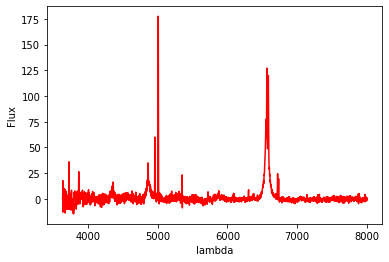

In [25]:
plt.plot(l,f, color='r')
plt.xlabel('lambda')
plt.ylabel('Flux')

#### Voilà! J'espère que, grâce à pandas, vous aurez un peu de plaisir à explorer vos données!

<!--NAVIGATION-->
<  [La bibliothèque Pandas](Part_5.ipynb) | [Sommaire](Intro_Phyton_Master.ipynb) >